# Running sentiment analysis on extracted news Data from cryptocompare.com and 

# Sentiment Analysis using Crypto News

In [1]:
import sys
print(sys.executable)

C:\Users\lavin\anaconda3\envs\PythonData\python.exe


In [2]:
# import libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import pymongo
from pymongo import MongoClient
import certifi
from mongo2_config import mongo_uri
from wordcloud import WordCloud, STOPWORDS
import datetime
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
plt.style.use('fivethirtyeight')

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk


In [3]:
# create a dataframe from the csv
path ="C:/UC_Berkeley\Analysis_Projects_Class_Folder/Module20_Final_Project\Data_News_Cryptocomp\Top_news_2016to2019_08_03(5year).csv"
df1 = pd.read_csv(path)
df1

,Unnamed: 0,id,guid,published_on,imageurl,title,url,source,body,tags,categories,upvotes,downvotes,lang,source_info.name,source_info.lang,source_info.img,Coin_Symbol,Rev_time,Dt_Rev_time
0,0,85,http://coremedia.info/supernet/item/274-supern...,1468195200,https://images.cryptocompare.com/news/default/...,SuperNET Weekly No. 18,http://coremedia.info/supernet/item/274-supern...,coremediasupernet,CORE and CORE Media were birthed out of the co...,SuperNET News,Blockchain|Technology|Sponsored,0,0,EN,NaN,NaN,NaN,XLM,2016-07-11 00:00:00,2016-07-11
1,1,14842,http://www.cryptocoremedia.com/old/supernet/it...,1468195200,https://images.cryptocompare.com/news/coremedi...,SuperNET Weekly No. 18,http://www.cryptocoremedia.com/old/supernet/it...,coremediasupernet,CORE and CORE Media were birthed out of the co...,SuperNET News,Blockchain|Technology|Sponsored,0,0,EN,NaN,NaN,NaN,XLM,2016-07-11 00:00:00,2016-07-11
2,2,85,http://coremedia.info/supernet/item/274-supern...,1468195200,https://images.cryptocompare.com/news/default/...,SuperNET Weekly No. 18,http://coremedia.info/supernet/item/274-supern...,coremediasupernet,CORE and CORE Media were birthed out of the co...,SuperNET News,Blockchain|Technology|Sponsored,0,0,EN,NaN,NaN,NaN,BUSD,2016-07-11 00:00:00,2016-07-11
3,3,14842,http://www.cryptocoremedia.com/old/supernet/it...,1468195200,https://images.cryptocompare.com/news/coremedi...,SuperNET Weekly No. 18,http://www.cryptocoremedia.com/old/supernet/it...,coremediasupernet,CORE and CORE Media were birthed out of the co...,SuperNET News,Blockchain|Technology|Sponsored,0,0,EN,NaN,NaN,NaN,BUSD,2016-07-11 00:00:00,2016-07-11
4,4,85,http://coremedia.info/supernet/item/274-supern...,1468195200,https://images.cryptocompare.com/news/default/...,SuperNET Weekly No. 18,http://coremedia.info/supernet/item/274-supern...,coremediasupernet,CORE and CORE Media were birthed out of the co...,SuperNET News,Blockchain|Technology|Sponsored,0,0,EN,NaN,NaN,NaN,DOGE,2016-07-11 00:00:00,2016-07-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164417,164417,2670546,https://www.cryptonewsz.com/?p=34644,1564925410,https://images.cryptocompare.com/news/cryptone...,Ethereum Price Analysis: Ethereum (ETH) Price ...,https://www.cryptonewsz.com/ethereum-price-ana...,cryptonewsz,Intraday chart embarks downtrend in Ethereum p...,Price Analysis|Cryptocurrency|Ethereum (ETH)|P...,ETH|Trading|Market|Business,0,0,EN,CryptoNewsZ,EN,https://images.cryptocompare.com/news/default/...,ETH,2019-08-04 13:30:10,2019-08-04
164418,164418,2669812,http://coingape.com/?p=38622,1564922749,https://images.cryptocompare.com/news/coingape...,"Crypto-Market Top Weekly Performers: Bitcoin, ...",https://coingape.com/crypto-market-btc-xmr-xtz...,coingape,"Bitcoin [BTC] broke above $10,000 due to risin...",Altcoin News|bitcoin cash|Bitcoin News|Ethereu...,XMR|BCH|ETH|Trading,0,0,EN,CoinGape,EN,https://images.cryptocompare.com/news/default/...,ETH,2019-08-04 12:45:49,2019-08-04
164419,164419,2667921,https://dailyhodl.com/?p=59988,1564916433,https://images.cryptocompare.com/news/dailyhod...,Microsoft Reveals New Ethereum-Based Project –...,https://dailyhodl.com/2019/08/04/microsoft-rev...,dailyhodl,The company plans to decentralize AI by allowi...,Altcoins|Crypto|Cryptocurrency|ETH|Ethereum|Li...,LTC|XRP|ETH|Altcoin,0,0,EN,The Daily Hodl,EN,https://images.cryptocompare.com/news/default/...,ETH,2019-08-04 11:00:33,2019-08-04
164420,164420,2666316,https://www.cryptonewsz.com/?p=34614,1564911316,https://images.cryptocompare.com/news/cryptone...,Tezos Price Analysis: Tezos Price Trading Belo...,https://www.cryptonewsz.com/tezos-price-analys...,cryptonewsz,"Tim Coulter, Owner, and Founder of Truffle, wh...",Price Analysis|Cryptocurrency|Price Prediction...,Trading|Market|ETH,0,0,EN,CryptoNewsZ,EN,https://images.cryptocompare.com/news/default/...,ETH,2019-08-04 09:35:16,2019-08-04


In [4]:
path ="C:/UC_Berkeley\Analysis_Projects_Class_Folder/Module20_Final_Project\Data_News_Cryptocomp\Top_news_2019to2020_02_28(5year).csv"
df2 = pd.read_csv(path)
df2

,Unnamed: 0,id,guid,published_on,imageurl,title,url,source,body,tags,categories,upvotes,downvotes,lang,source_info.name,source_info.lang,source_info.img,Coin_Symbol,Rev_time,Dt_Rev_time
0,0,2679165,https://cointelegraph.com/news/why-is-the-us-n...,1564959300,https://images.cryptocompare.com/news/cointele...,Why Is the US Not Yet a Leader in Crypto Regul...,https://cointelegraph.com/news/why-is-the-us-n...,cointelegraph,Experts in crypto and blockchain take on the q...,Bitcoin|Cryptocurrencies|Blockchain|USA|regula...,Regulation|Blockchain|BTC,0,0,EN,CoinTelegraph,EN,https://images.cryptocompare.com/news/default/...,BTC,2019-08-04 22:55:00,2019-08-04
1,1,2678549,https://www.cryptopolitan.com/?p=21780,1564957077,https://images.cryptocompare.com/news/cryptopo...,Bank of China explains Bitcoin position and pr...,https://www.cryptopolitan.com/bank-of-china-ex...,cryptopolitan,What might have been thought to be happening i...,Bitcoin News|bank of china bitcoin|bank of chi...,BTC|Fiat|Asia|Regulation,0,0,EN,Cryptopolitan,EN,https://images.cryptocompare.com/news/default/...,BTC,2019-08-04 22:17:57,2019-08-04
2,2,2678222,https://www.ccn.com/?p=194647,1564956000,https://images.cryptocompare.com/news/ccn/cqM1...,BitMEXodus: Bitcoin Traders Abandon Exchange A...,https://www.ccn.com/crypto/bitcoin-traders-fle...,ccn,July wasn't exactly a banner month for crypto ...,Bitcoin Analysis|Bitcoin Exchange|Cryptocurren...,BTC|Exchange|Market|Trading|Business,0,0,EN,CCN,EN,https://images.cryptocompare.com/news/default/...,BTC,2019-08-04 22:00:00,2019-08-04
3,3,2678040,https://www.cryptoglobe.com/latest/2019/08/hil...,1564955287,https://images.cryptocompare.com/news/cryptogl...,Hilarious Collection of Crypto Twitter Predict...,https://www.cryptoglobe.com/latest/2019/08/hil...,cryptoglobe,Crypto users took to Twitter to give their pre...,Bitcoin|Ethereum|Altcoins,BTC|ETH|Blockchain|Technology|Altcoin,0,0,EN,CryptoGlobe,EN,https://images.cryptocompare.com/news/default/...,BTC,2019-08-04 21:48:07,2019-08-04
4,4,2677786,https://www.newsbtc.com/?p=392200,1564954212,https://images.cryptocompare.com/news/newsbtc/...,"Max Keiser Claims Bitcoin May Target $15,000 T...",https://www.newsbtc.com/2019/08/04/max-keiser-...,newsbtc,Bitcoin and the aggregated crypto markets have...,Bitcoin|Crypto|bitcoin|btc|crypto,BTC|Market|Trading,0,0,EN,NewsBTC,EN,https://images.cryptocompare.com/news/default/...,BTC,2019-08-04 21:30:12,2019-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54986,54986,9999274,https://zycrypto.com/?p=39358,1582999786,https://images.cryptocompare.com/news/zycrypto...,Ripple’s Untapped Potential – XRP Ledger As A ...,https://zycrypto.com/ripples-untapped-potentia...,zycrypto,"Since its inception back in 2012, Ripple has b...",News|XRP|Ripple|XRP News,XRP|Exchange|Blockchain|Technology|Wallet,0,0,EN,ZyCrypto,EN,https://images.cryptocompare.com/news/default/...,XRP,2020-02-29 18:09:46,2020-02-29
54987,54987,9990985,https://dailyhodl.com/?p=88000,1582989303,https://images.cryptocompare.com/news/dailyhod...,3 Million Traders Reveal Most Popular Crypto A...,https://dailyhodl.com/2020/02/29/3-million-tra...,dailyhodl,A year-long poll at a London-based crypto exch...,Altcoins|Ripple and XRP|Bitcoin|BTC|Crypto|New...,BTC|ETH|XRP|Exchange|Market,0,0,EN,The Daily Hodl,EN,https://images.cryptocompare.com/news/default/...,XRP,2020-02-29 15:15:03,2020-02-29
54988,54988,9977763,http://coingape.com/?p=64417,1582973590,https://images.cryptocompare.com/news/coingape...,XRP Rebounds from .886 Fib Retracement – Will ...,https://coingape.com/xrp-rebounds-from-886-fib...,coingape,XRP dropped by 13% over the past 7-days of tra...,Price Analysis|Ripple Price Analysis|xrp|xrpusd,XRP|Market|Trading,0,0,EN,CoinGape,EN,https://images.cryptocompare.com/news/default/...,XRP,2020-02-29 10:53:10,2020-02-29
54989,54989,9974493,https://bitcoinist.com/?p=129081,1582969532,https://images.cryptocompare.com/news/bitcoini...,Here’s How Ripple W

In [5]:
path ="C:/UC_Berkeley\Analysis_Projects_Class_Folder/Module20_Final_Project\Data_News_Cryptocomp\Top_news_2020to2020_03_03(5year).csv"
df3 = pd.read_csv(path)
df3

,Unnamed: 0,id,guid,published_on,imageurl,title,url,source,body,tags,categories,upvotes,downvotes,lang,source_info.name,source_info.lang,source_info.img,Coin_Symbol,Rev_time,Dt_Rev_time
0,0,10019143,https://nulltx.com/?p=98360,1583017232,https://images.cryptocompare.com/news/themerkl...,Texas Becomes an Increasingly Popular Region f...,https://nulltx.com/texas-becomes-an-increasing...,themerkle,Setting up a reliable and profitable Bitcoin m...,Crypto|bitcoin mining|Renewable Energy|Texas,BTC|Mining,0,0,EN,NullTx,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-02-29 23:00:32,2020-02-29
1,1,10013325,https://www.newsbtc.com/?p=416461,1583017222,https://images.cryptocompare.com/news/newsbtc/...,"Crypto Tidbits: Bitcoin Plunges Under $9,000, ...",https://www.newsbtc.com/2020/02/29/crypto-tidb...,newsbtc,"Another week, another round of Crypto Tidbits....",Bitcoin|Crypto|bitcoin|Crypto Tidbits|market,BTC|Market|Exchange,0,0,EN,NewsBTC,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-02-29 23:00:22,2020-02-29
2,2,10011232,https://dailyhodl.com/?p=88056,1583014539,https://images.cryptocompare.com/news/dailyhod...,Veteran Trader Who Predicted Bitcoin (BTC) Ris...,https://dailyhodl.com/2020/02/29/veteran-trade...,dailyhodl,A veteran technical trader who was immortalize...,Bitcoin|BTC|Markets|News,BTC|Business|Market|Trading,0,0,EN,The Daily Hodl,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-02-29 22:15:39,2020-02-29
3,3,10010416,https://www.livebitcoinnews.com/?p=58155,1583013629,https://images.cryptocompare.com/news/livebitc...,The U.S. Says “No” to Any and All Petro Trading,https://www.livebitcoinnews.com/the-u-s-says-n...,livebitcoinnews,The U.S. government is being very strict when ...,Altcoin News|News|Donald Trump|Nicolás Maduro|...,Trading|BTC,0,0,EN,Live Bitcoin News,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-02-29 22:00:29,2020-02-29
4,4,10010417,https://www.newsbtc.com/?p=416462,1583013622,https://images.cryptocompare.com/news/newsbtc/...,"This Crypto Just Set All-Time Highs, and Analy...",https://www.newsbtc.com/2020/02/29/this-crypto...,newsbtc,Chainlink’s price action throughout 2019 and 2...,Crypto|chainlink|crypto|Link,Trading|BTC|Market,0,0,EN,NewsBTC,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-02-29 22:00:22,2020-02-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,1136,10281802,https://eng.ambcrypto.com/?p=35212,1583350258,https://images.cryptocompare.com/news/ambcrypt...,Bitcoin's OI and volume put/call ratio close t...,https://eng.ambcrypto.com/bitcoins-oi-and-volu...,ambcrypto,As Bitcoin struggled to recover from its radic...,Bitcoin|News|Social|Trading View,BTC|Market,0,0,EN,AMB Crypto,EN,https://images.cryptocompare.com/news/default/...,BUSD,2020-03-04 19:30:58,2020-03-04
1137,1137,10281734,https://www.theblockcrypto.com/genesis/57794/,1583350158,https://images.cryptocompare.com/news/theblock...,Lightning in a bottle: liquidity on the Lightn...,https://www.theblockcrypto.com/genesis/57794/l...,theblock,Quick TakeBecause Lightning is structured arou...,Bitcoin|bitcoin|lightning network,BTC,0,0,EN,TheBlock,EN,https://images.cryptocompare.com/news/default/...,BUSD,2020-03-04 19:29:18,2020-03-04
1138,1138,12279902,https://btcmagwpstage.wpengine.com/?p=39076,1583349968,https://images.cryptocompare.com/news/bitcoinm...,Amir Taaki on Bitcoin and Building Dissident T...,https://btcmagwpstage.wpengine.com/articles/am...,bitcoinmagazine,Amir Taaki was one of Bitcoin’s first-ever ded...,Privacy & Security|amir taaki|dark wallet|syria,BTC|Technology,0,0,EN,Bitcoin Magazine,EN,https://images.cryptocompare.com/news/default/...,BUSD,2020-03-04 19:26:08,2020-03-04
1139,1139,10281516,https://bitcoinmagazine.com/?p=39076,1583349968,https://images.cryptocompare.com/news/bitcoinm...,Amir Taaki on Bitcoin and Building Dissident T...,https://bitcoinmagazine.com/articles/amir-taak...,bitcoinmagazine,Amir Taaki was one

In [6]:
path ="C:/UC_Berkeley\Analysis_Projects_Class_Folder/Module20_Final_Project\Data_News_Cryptocomp\Top_news_2020to2020_04_10(5year).csv"
df4 = pd.read_csv(path)
df4

,Unnamed: 0,id,guid,published_on,imageurl,title,url,source,body,tags,categories,upvotes,downvotes,lang,source_info.name,source_info.lang,source_info.img,Coin_Symbol,Rev_time,Dt_Rev_time
0,0,10224634,https://www.newsbtc.com/?p=416806,1583276402,https://images.cryptocompare.com/news/newsbtc/...,Crypto Will Thrive in 2020 as Governments Stru...,https://www.newsbtc.com/2020/03/03/crypto-will...,newsbtc,Global efforts to stimulate markets look likel...,Bitcoin|Crypto|bitcoin|bullish|cryptocurrency,BTC|Market|Trading,0,0,EN,NewsBTC,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-03-03 23:00:02,2020-03-03
1,1,10226419,https://decrypt.co/?p=21222,1583275536,https://images.cryptocompare.com/news/decrypt/...,Cosmos price fails to recover from project in-...,https://decrypt.co/21222/cosmos-price-project-...,decrypt,Problems at Cosmos are proving too much for it...,Markets|Atom|bitcoin|Cosmos|cryptocurrency|fin...,Trading|BTC|Market|ICO,0,0,EN,Decrypt,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-03-03 22:45:36,2020-03-03
2,2,10223176,https://eng.ambcrypto.com/?p=35089,1583274630,https://images.cryptocompare.com/news/ambcrypt...,"Chainlink, Algorand, Dogecoin rally as Bitcoin...",https://eng.ambcrypto.com/chainlink-algorand-d...,ambcrypto,While Bitcoin regained its dominance of 63.7% ...,Altcoins|News|Social|Trading View|Hide Cryptop...,BTC|Market|Trading|Altcoin,0,0,EN,AMB Crypto,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-03-03 22:30:30,2020-03-03
3,3,10221720,https://www.livebitcoinnews.com/?p=58186,1583272836,https://images.cryptocompare.com/news/livebitc...,Australia Receives “Test” Version of Libra,https://www.livebitcoinnews.com/australia-rece...,livebitcoinnews,The Reserve Bank of Australia (RBA) says its r...,Altcoin News|News|australia|Libra|Tony Richards,Fiat|BTC,0,1,EN,Live Bitcoin News,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-03-03 22:00:36,2020-03-03
4,4,10221721,https://www.newsbtc.com/?p=416801,1583272822,https://images.cryptocompare.com/news/newsbtc/...,Bitcoin CME Futures Volume is Collapsing Amids...,https://www.newsbtc.com/2020/03/03/bitcoin-cme...,newsbtc,The global markets are currently caught within...,Bitcoin|Crypto|bitcoin|btc|crypto,BTC|Market|Fiat|Business,0,0,EN,NewsBTC,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-03-03 22:00:22,2020-03-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9650,9650,12399067,https://dailyhodl.com/?p=92846,1586540308,https://images.cryptocompare.com/news/dailyhod...,Consumer Electronics Giant HTC Bringing Crypto...,https://dailyhodl.com/2020/04/10/consumer-elec...,dailyhodl,Taiwanese consumer electronics giant HTC is br...,Altcoins|crypto mining|htc exodus|monero|News|...,XMR|Mining|BTC|Wallet|Altcoin,0,0,EN,The Daily Hodl,EN,https://images.cryptocompare.com/news/default/...,BUSD,2020-04-10 17:38:28,2020-04-10
9651,9651,12398599,https://www.newsbtc.com/?p=420419,1586539850,https://images.cryptocompare.com/news/newsbtc/...,Gold Records Strongest Weekly Close Since Rece...,https://www.newsbtc.com/2020/04/10/gold-record...,newsbtc,The original ultra-scarce asset used for trade...,Uncategorized|dollar|economy|gold|inflation|re...,Fiat|Trading,0,0,EN,NewsBTC,EN,https://images.cryptocompare.com/news/default/...,BUSD,2020-04-10 17:30:50,2020-04-10
9652,9652,12404908,https://cointelegraph.com/news/price-analysis-...,1586546280,https://images.cryptocompare.com/news/cointele...,"Price Analysis April 10: BTC, ETH, XRP, BCH, B...",https://cointelegraph.com/news/price-analysis-...,cointelegraph,"Bitcoin needs to stay above $6,500 to maintain...",Bitcoin|Markets|Ethereum|Ripple|Bitcoin Cash|B...,BCH|ETH|LTC|XRP|Market,0,0,EN,CoinTelegraph,EN,https://images.cryptocompare.com/news/default/...,LTC,2020-04-10 19:18:00,2020-04-10
9653,9653,12396838,https://cointelegraph.com/news/ledger-expands-...,1586537640,https://images.cryptocompare.com/news/cointele...,Ledger Expands Crypto P

In [7]:
path ="C:/UC_Berkeley\Analysis_Projects_Class_Folder/Module20_Final_Project\Data_News_Cryptocomp\Top_news_2020to2020_06_28(5year).csv"
df5 = pd.read_csv(path)
df5

,Unnamed: 0,id,guid,published_on,imageurl,title,url,source,body,tags,categories,upvotes,downvotes,lang,source_info.name,source_info.lang,source_info.img,Coin_Symbol,Rev_time,Dt_Rev_time
0,0,12417653,https://nulltx.com/?p=98731,1586556017,https://images.cryptocompare.com/news/themerkl...,Bitcoin Might not Turn Bullish until After the...,https://nulltx.com/bitcoin-might-not-turn-bull...,themerkle,There are still many questions regarding the f...,Crypto|bitcoin|Coronavirus|Economic Policy,BTC|Trading|Market,0,0,EN,NullTx,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-04-10 22:00:17,2020-04-10
1,1,12411370,https://eng.ambcrypto.com/?p=42198,1586554244,https://images.cryptocompare.com/news/ambcrypt...,Bitcoin likely to cross $8000 mark before its ...,https://eng.ambcrypto.com/bitcoin-likely-to-cr...,ambcrypto,Fours day after finally breaching the $7000 ma...,Bitcoin|News|Social|Analysis,BTC|Market|Trading,0,0,EN,AMB Crypto,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-04-10 21:30:44,2020-04-10
2,2,12409898,https://www.newsbtc.com/?p=420470,1586552459,https://images.cryptocompare.com/news/newsbtc/...,This Crypto Could Explode Over 100% If It Buil...,https://www.newsbtc.com/2020/04/10/this-crypto...,newsbtc,It has been an incredibly volatile year for Ch...,Crypto|chainlink|LINKBTC|LINKUSD,Trading|BTC,0,0,EN,NewsBTC,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-04-10 21:00:59,2020-04-10
3,3,12409778,https://cryptoslate.com/?p=130346,1586552432,https://images.cryptocompare.com/news/cryptosl...,Bitcoin’s open interest skyrocketing indicates...,https://cryptoslate.com/bitcoins-open-interest...,cryptoslate,Bitcoin has seen some notable overnight volati...,Analysis|Price Watch|BTCUSD,Trading|BTC|Market,0,0,EN,CryptoSlate,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-04-10 21:00:32,2020-04-10
4,4,12408503,https://decrypt.co/?p=25225,1586550908,https://images.cryptocompare.com/news/decrypt/...,Venezuelans have a new way to send crypto with...,https://decrypt.co/25225/venezuelans-have-new-...,decrypt,A Venezuelan crypto exchange has developed a s...,Technology|BTC|DASH,BTC|DASH|Exchange|Technology,0,0,EN,Decrypt,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-04-10 20:35:08,2020-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20383,20383,17069790,https://www.cryptonewsz.com/?p=64636,1593415642,https://images.cryptocompare.com/news/cryptone...,Are virtual events the new norm? The Story of ...,https://www.cryptonewsz.com/are-virtual-events...,cryptonewsz,"Webit Virtual, the first fully transformed vir...",NaN,ETH,0,1,EN,CryptoNewsZ,EN,https://images.cryptocompare.com/news/default/...,ETH,2020-06-29 07:27:22,2020-06-29
20384,20384,17069475,https://www.theblockcrypto.com/linked/69785/,1593415305,https://images.cryptocompare.com/news/theblock...,"Balancer pools drained of more than $450,000 d...",https://www.theblockcrypto.com/linked/69785/ba...,theblock,"Two multi-token pools on Balancer, an automate...",Crime|DeFi|Ethereum|attacker|balancer|defi exp...,Mining|ICO|ETH|Market|Blockchain,0,1,EN,TheBlock,EN,https://images.cryptocompare.com/news/default/...,ETH,2020-06-29 07:21:45,2020-06-29
20385,20385,17068193,https://www.newsbtc.com/?p=428856,1593413925,https://images.cryptocompare.com/news/newsbtc/...,Ethereum Facing Uphill Task Near $228: Here’s ...,https://www.newsbtc.com/2020/06/29/ethereum-fa...,newsbtc,Ethereum is currently recovering from the $216...,Ethereum|Analysis|ethereum|ethusd|ETHUSDT,ETH|Trading|Market|Fiat,0,1,EN,NewsBTC,EN,https://images.cryptocompare.com/news/default/...,ETH,2020-06-29 06:58:45,2020-06-29
20386,20386,17051328,https://www.newsbtc.com/?p=428843,1593396052,https://images.cryptocompare.com/news/newsbtc/...,A Hacker Just Drained $500k in Ethereum & Altc...,https://www.newsbtc.com/2020/06/29/428843/?utm...,newsbtc,Ethereum&#8217;s budding decentralized finance...,Ethereum|Crypto|Balancer Labs|DeFi|ethe

In [8]:
path ="C:/UC_Berkeley\Analysis_Projects_Class_Folder/Module20_Final_Project\Data_News_Cryptocomp\Top_news_2020to2021_07_06(5year).csv"
df6 = pd.read_csv(path)
df6

,Unnamed: 0,id,guid,published_on,imageurl,title,url,source,body,tags,categories,upvotes,downvotes,lang,source_info.name,source_info.lang,source_info.img,Coin_Symbol,Rev_time,Dt_Rev_time
0,0,17115701,https://www.coindesk.com/index.php?p=489795,1593469399,https://images.cryptocompare.com/news/coindesk...,Digital Currency Guru of $568M Cyber Fraud For...,https://www.coindesk.com/digital-currency-guru...,coindesk,Sergey Medvedev pleaded guilty to racketeering...,News|Fraud|Escrow|Lawsuit|Credit Card Fraud,BTC|Fiat,0,0,EN,CoinDesk,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-06-29 22:23:19,2020-06-29
1,1,17114683,https://dailyhodl.com/?p=102645,1593468320,https://images.cryptocompare.com/news/dailyhod...,XRP Architect David Schwartz Denies Being Bitc...,https://dailyhodl.com/2020/06/29/xrp-architect...,dailyhodl,Ripple&#8217;s chief technology officer David ...,Bitcoin|BTC|News|Ripple|Satoshi Nakamoto|XRP,BTC|XRP|Technology,0,0,EN,The Daily Hodl,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-06-29 22:05:20,2020-06-29
2,2,17113721,https://decrypt.co/?p=34011,1593467166,https://images.cryptocompare.com/news/decrypt/...,How to use DeFi to earn passive income with yo...,https://decrypt.co/34011/how-defi-earn-passive...,decrypt,It’s risky—but it can be done: Andreas Antonop...,Coins|BTC|ETH,BTC|ETH,0,0,EN,Decrypt,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-06-29 21:46:06,2020-06-29
3,3,17113573,https://cointelegraph.com/news/researchers-say...,1593466680,https://images.cryptocompare.com/news/cointele...,Researchers Say New Lightning Network Attack C...,https://cointelegraph.com/news/researchers-say...,cointelegraph,The Lightning Network is susceptible to attack...,Blockchain|Lightning Network|Cybersecurity|Hac...,BTC|Blockchain,0,0,EN,CoinTelegraph,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-06-29 21:38:00,2020-06-29
4,4,17112472,https://cointelegraph.com/news/bitcoin-as-a-to...,1593465480,https://images.cryptocompare.com/news/cointele...,Bitcoin as a tool to fight authoritarian regim...,https://cointelegraph.com/news/bitcoin-as-a-to...,cointelegraph,"Professor of Economics, Sergei Guriev, told Co...",Bitcoin|Blockchain|Russia|Economy|Central Bank,BTC|Blockchain,0,0,EN,CoinTelegraph,EN,https://images.cryptocompare.com/news/default/...,BTC,2020-06-29 21:18:00,2020-06-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95831,95831,27010028,https://www.theblockcrypto.com/post/110591,1625598316,https://images.cryptocompare.com/news/default/...,"Fintechs are hungry for DeFi yields, says Comp...",https://www.theblockcrypto.com/post/110591/fin...,theblock,"DeFi and traditional finance are converging, s...",The Block|blockchain|DeFi|Ethereum|fintech,ETH|Blockchain,0,0,EN,TheBlock,EN,https://images.cryptocompare.com/news/default/...,DOGE,2021-07-06 19:05:16,2021-07-06
95832,95832,27010026,https://ambcrypto.com/?p=169149,1625598037,https://images.cryptocompare.com/news/default/...,Why this is crucial to XRP’s trajectory over t...,https://ambcrypto.com/why-this-is-crucial-to-x...,ambcrypto,The global cryptocurrency market noted a bit o...,Altcoins|Analysis|HideCryptopanic|News|News 1|...,XRP|Market|Trading|Altcoin,0,0,EN,AMB Crypto,EN,https://images.cryptocompare.com/news/default/...,DOGE,2021-07-06 19:00:37,2021-07-06
95833,95833,27010027,https://cryptoslate.com/?p=194428,1625598021,https://images.cryptocompare.com/news/default/...,Ripple CTO slams regulators as Barclays blocks...,https://cryptoslate.com/ripple-cto-slams-regul...,cryptoslate,Barclays UK customers have been blocked from t...,Banking|Exchanges|Regulation|xrp,Exchange|XRP|Regulation|Fiat,0,0,EN,CryptoSlate,EN,https://images.cryptocompare.com/news/default/...,DOGE,2021-07-06 19:00:21,2021-07-06
95834,95834,27010025,https://www.livebitcoinnews.com/?p=65282,1625598011,https://images.cryptocompare.com/news/default/...,Crypto Head: The U.S. Is the “Most-Ready” Nati...,https://www.livebi

In [9]:
# checking for mull values
df1.isnull().sum().sum()
df1.isna().sum()

Unnamed: 0             0
id                     0
guid                   0
published_on           0
imageurl               0
title                 10
url                    0
source                 0
body                  27
tags                8988
categories             0
upvotes                0
downvotes              0
lang                   0
source_info.name     410
source_info.lang     410
source_info.img      410
Coin_Symbol            0
Rev_time               0
Dt_Rev_time            0
dtype: int64

In [10]:
# checking for mull values
df2.isnull().sum().sum()
df2.isna().sum()

Unnamed: 0            0
id                    0
guid                  0
published_on          0
imageurl              0
title                 0
url                   0
source                0
body                  9
tags                178
categories            0
upvotes               0
downvotes             0
lang                  0
source_info.name      0
source_info.lang      0
source_info.img       0
Coin_Symbol           0
Rev_time              0
Dt_Rev_time           0
dtype: int64

In [11]:
print(df2.dtypes)

Unnamed: 0           int64
id                   int64
guid                object
published_on         int64
imageurl            object
title               object
url                 object
source              object
body                object
tags                object
categories          object
upvotes              int64
downvotes            int64
lang                object
source_info.name    object
source_info.lang    object
source_info.img     object
Coin_Symbol         object
Rev_time            object
Dt_Rev_time         object
dtype: object


In [12]:
df1.drop(columns=['Unnamed: 0','id', 'guid', 'published_on', 'imageurl', 'url', 'source_info.lang','tags','source_info.img','upvotes','downvotes','lang','source_info.img'],axis=1, inplace=True)
df1

,title,source,body,categories,source_info.name,Coin_Symbol,Rev_time,Dt_Rev_time
0,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,XLM,2016-07-11 00:00:00,2016-07-11
1,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,XLM,2016-07-11 00:00:00,2016-07-11
2,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,BUSD,2016-07-11 00:00:00,2016-07-11
3,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,BUSD,2016-07-11 00:00:00,2016-07-11
4,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,DOGE,2016-07-11 00:00:00,2016-07-11
...,...,...,...,...,...,...,...,...
164417,Ethereum Price Analysis: Ethereum (ETH) Price ...,cryptonewsz,Intraday chart embarks downtrend in Ethereum p...,ETH|Trading|Market|Business,CryptoNewsZ,ETH,2019-08-04 13:30:10,2019-08-04
164418,"Crypto-Market Top Weekly Performers: Bitcoin, ...",coingape,"Bitcoin [BTC] broke above $10,000 due to risin...",XMR|BCH|ETH|Trading,CoinGape,ETH,2019-08-04 12:45:49,2019-08-04
164419,Microsoft Reveals New Ethereum-Based Project –...,dailyhodl,The company plans to decentralize AI by allowi...,LTC|XRP|ETH|Altcoin,The Daily Hodl,ETH,2019-08-04 11:00:33,2019-08-04
164420,Tezos Price Analysis: Tezos Price Trading Belo...,cryptonewsz,"Tim Coulter, Owner, and Founder of Truffle, wh...",Trading|Market|ETH,CryptoNewsZ,ETH,2019-08-04 09:35:16,2019-08-04


In [13]:
df1 = df1[df1['body'].notna()]
df1

,title,source,body,categories,source_info.name,Coin_Symbol,Rev_time,Dt_Rev_time
0,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,XLM,2016-07-11 00:00:00,2016-07-11
1,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,XLM,2016-07-11 00:00:00,2016-07-11
2,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,BUSD,2016-07-11 00:00:00,2016-07-11
3,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,BUSD,2016-07-11 00:00:00,2016-07-11
4,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,DOGE,2016-07-11 00:00:00,2016-07-11
...,...,...,...,...,...,...,...,...
164417,Ethereum Price Analysis: Ethereum (ETH) Price ...,cryptonewsz,Intraday chart embarks downtrend in Ethereum p...,ETH|Trading|Market|Business,CryptoNewsZ,ETH,2019-08-04 13:30:10,2019-08-04
164418,"Crypto-Market Top Weekly Performers: Bitcoin, ...",coingape,"Bitcoin [BTC] broke above $10,000 due to risin...",XMR|BCH|ETH|Trading,CoinGape,ETH,2019-08-04 12:45:49,2019-08-04
164419,Microsoft Reveals New Ethereum-Based Project –...,dailyhodl,The company plans to decentralize AI by allowi...,LTC|XRP|ETH|Altcoin,The Daily Hodl,ETH,2019-08-04 11:00:33,2019-08-04
164420,Tezos Price Analysis: Tezos Price Trading Belo...,cryptonewsz,"Tim Coulter, Owner, and Founder of Truffle, wh...",Trading|Market|ETH,CryptoNewsZ,ETH,2019-08-04 09:35:16,2019-08-04


In [14]:
df1['body'] = df1['body'].astype('str')
df1['title'] = df1['title'].astype('str')
print(df1.dtypes)

title               object
source              object
body                object
categories          object
source_info.name    object
Coin_Symbol         object
Rev_time            object
Dt_Rev_time         object
dtype: object


<ipython-input-14-aa9b812e8717>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['body'] = df1['body'].astype('str')
<ipython-input-14-aa9b812e8717>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['title'] = df1['title'].astype('str')


In [15]:
df2.drop(columns=['Unnamed: 0','id', 'guid', 'published_on', 'imageurl', 'url', 'source_info.lang','tags','source_info.img','upvotes','downvotes','lang','source_info.img'],axis=1, inplace=True)
df2 = df2[df2['body'].notna()]
df2['body'] = df2['body'].astype('str')
df2['title'] = df2['title'].astype('str')
df2

<ipython-input-15-b46147405290>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['body'] = df2['body'].astype('str')
<ipython-input-15-b46147405290>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['title'] = df2['title'].astype('str')


,title,source,body,categories,source_info.name,Coin_Symbol,Rev_time,Dt_Rev_time
0,Why Is the US Not Yet a Leader in Crypto Regul...,cointelegraph,Experts in crypto and blockchain take on the q...,Regulation|Blockchain|BTC,CoinTelegraph,BTC,2019-08-04 22:55:00,2019-08-04
1,Bank of China explains Bitcoin position and pr...,cryptopolitan,What might have been thought to be happening i...,BTC|Fiat|Asia|Regulation,Cryptopolitan,BTC,2019-08-04 22:17:57,2019-08-04
2,BitMEXodus: Bitcoin Traders Abandon Exchange A...,ccn,July wasn't exactly a banner month for crypto ...,BTC|Exchange|Market|Trading|Business,CCN,BTC,2019-08-04 22:00:00,2019-08-04
3,Hilarious Collection of Crypto Twitter Predict...,cryptoglobe,Crypto users took to Twitter to give their pre...,BTC|ETH|Blockchain|Technology|Altcoin,CryptoGlobe,BTC,2019-08-04 21:48:07,2019-08-04
4,"Max Keiser Claims Bitcoin May Target $15,000 T...",newsbtc,Bitcoin and the aggregated crypto markets have...,BTC|Market|Trading,NewsBTC,BTC,2019-08-04 21:30:12,2019-08-04
...,...,...,...,...,...,...,...,...
54986,Ripple’s Untapped Potential – XRP Ledger As A ...,zycrypto,"Since its inception back in 2012, Ripple has b...",XRP|Exchange|Blockchain|Technology|Wallet,ZyCrypto,XRP,2020-02-29 18:09:46,2020-02-29
54987,3 Million Traders Reveal Most Popular Crypto A...,dailyhodl,A year-long poll at a London-based crypto exch...,BTC|ETH|XRP|Exchange|Market,The Daily Hodl,XRP,2020-02-29 15:15:03,2020-02-29
54988,XRP Rebounds from .886 Fib Retracement – Will ...,coingape,XRP dropped by 13% over the past 7-days of tra...,XRP|Market|Trading,CoinGape,XRP,2020-02-29 10:53:10,2020-02-29
54989,Here’s How Ripple Will Power Remittances to th...,bitcoinist,The Dubai-based RAKBANK and BDO Unibank (a ful...,XRP|Fiat|Altcoin,Bitcoinist,XRP,2020-02-29 09:45:32,2020-02-29


In [16]:
print(df2.dtypes)

title               object
source              object
body                object
categories          object
source_info.name    object
Coin_Symbol         object
Rev_time            object
Dt_Rev_time         object
dtype: object


In [17]:
df3.drop(columns=['Unnamed: 0','id', 'guid', 'published_on', 'imageurl', 'url', 'source_info.lang','tags','source_info.img','upvotes','downvotes','lang','source_info.img'],axis=1, inplace=True)
df3 = df3[df3['body'].notna()]
df3['body'] = df3['body'].astype('str')
df3['title'] = df3['title'].astype('str')
df3

,title,source,body,categories,source_info.name,Coin_Symbol,Rev_time,Dt_Rev_time
0,Texas Becomes an Increasingly Popular Region f...,themerkle,Setting up a reliable and profitable Bitcoin m...,BTC|Mining,NullTx,BTC,2020-02-29 23:00:32,2020-02-29
1,"Crypto Tidbits: Bitcoin Plunges Under $9,000, ...",newsbtc,"Another week, another round of Crypto Tidbits....",BTC|Market|Exchange,NewsBTC,BTC,2020-02-29 23:00:22,2020-02-29
2,Veteran Trader Who Predicted Bitcoin (BTC) Ris...,dailyhodl,A veteran technical trader who was immortalize...,BTC|Business|Market|Trading,The Daily Hodl,BTC,2020-02-29 22:15:39,2020-02-29
3,The U.S. Says “No” to Any and All Petro Trading,livebitcoinnews,The U.S. government is being very strict when ...,Trading|BTC,Live Bitcoin News,BTC,2020-02-29 22:00:29,2020-02-29
4,"This Crypto Just Set All-Time Highs, and Analy...",newsbtc,Chainlink’s price action throughout 2019 and 2...,Trading|BTC|Market,NewsBTC,BTC,2020-02-29 22:00:22,2020-02-29
...,...,...,...,...,...,...,...,...
1136,Bitcoin's OI and volume put/call ratio close t...,ambcrypto,As Bitcoin struggled to recover from its radic...,BTC|Market,AMB Crypto,BUSD,2020-03-04 19:30:58,2020-03-04
1137,Lightning in a bottle: liquidity on the Lightn...,theblock,Quick TakeBecause Lightning is structured arou...,BTC,TheBlock,BUSD,2020-03-04 19:29:18,2020-03-04
1138,Amir Taaki on Bitcoin and Building Dissident T...,bitcoinmagazine,Amir Taaki was one of Bitcoin’s first-ever ded...,BTC|Technology,Bitcoin Magazine,BUSD,2020-03-04 19:26:08,2020-03-04
1139,Amir Taaki on Bitcoin and Building Dissident T...,bitcoinmagazine,Amir Taaki was one of Bitcoin’s first-ever ded...,BTC|Technology,Bitcoin Magazine,BUSD,2020-03-04 19:26:08,2020-03-04


In [18]:
df4.drop(columns=['Unnamed: 0','id', 'guid', 'published_on', 'imageurl', 'url', 'source_info.lang','tags','source_info.img','upvotes','downvotes','lang','source_info.img'],axis=1, inplace=True)
df4 = df4[df4['body'].notna()]
df4['body'] = df4['body'].astype('str')
df4['title'] = df4['title'].astype('str')
df4

,title,source,body,categories,source_info.name,Coin_Symbol,Rev_time,Dt_Rev_time
0,Crypto Will Thrive in 2020 as Governments Stru...,newsbtc,Global efforts to stimulate markets look likel...,BTC|Market|Trading,NewsBTC,BTC,2020-03-03 23:00:02,2020-03-03
1,Cosmos price fails to recover from project in-...,decrypt,Problems at Cosmos are proving too much for it...,Trading|BTC|Market|ICO,Decrypt,BTC,2020-03-03 22:45:36,2020-03-03
2,"Chainlink, Algorand, Dogecoin rally as Bitcoin...",ambcrypto,While Bitcoin regained its dominance of 63.7% ...,BTC|Market|Trading|Altcoin,AMB Crypto,BTC,2020-03-03 22:30:30,2020-03-03
3,Australia Receives “Test” Version of Libra,livebitcoinnews,The Reserve Bank of Australia (RBA) says its r...,Fiat|BTC,Live Bitcoin News,BTC,2020-03-03 22:00:36,2020-03-03
4,Bitcoin CME Futures Volume is Collapsing Amids...,newsbtc,The global markets are currently caught within...,BTC|Market|Fiat|Business,NewsBTC,BTC,2020-03-03 22:00:22,2020-03-03
...,...,...,...,...,...,...,...,...
9650,Consumer Electronics Giant HTC Bringing Crypto...,dailyhodl,Taiwanese consumer electronics giant HTC is br...,XMR|Mining|BTC|Wallet|Altcoin,The Daily Hodl,BUSD,2020-04-10 17:38:28,2020-04-10
9651,Gold Records Strongest Weekly Close Since Rece...,newsbtc,The original ultra-scarce asset used for trade...,Fiat|Trading,NewsBTC,BUSD,2020-04-10 17:30:50,2020-04-10
9652,"Price Analysis April 10: BTC, ETH, XRP, BCH, B...",cointelegraph,"Bitcoin needs to stay above $6,500 to maintain...",BCH|ETH|LTC|XRP|Market,CoinTelegraph,LTC,2020-04-10 19:18:00,2020-04-10
9653,Ledger Expands Crypto Payment Options with Cry...,cointelegraph,Wallet producer Ledger allows its customers to...,Wallet|BTC|LTC|XRP|Altcoin,CoinTelegraph,LTC,2020-04-10 16:54:00,2020-04-10


In [19]:
df5.drop(columns=['Unnamed: 0','id', 'guid', 'published_on', 'imageurl', 'url', 'source_info.lang','tags','source_info.img','upvotes','downvotes','lang','source_info.img'],axis=1, inplace=True)
df5 = df5[df5['body'].notna()]
df5['body'] = df5['body'].astype('str')
df5['title'] = df5['title'].astype('str')
df5

,title,source,body,categories,source_info.name,Coin_Symbol,Rev_time,Dt_Rev_time
0,Bitcoin Might not Turn Bullish until After the...,themerkle,There are still many questions regarding the f...,BTC|Trading|Market,NullTx,BTC,2020-04-10 22:00:17,2020-04-10
1,Bitcoin likely to cross $8000 mark before its ...,ambcrypto,Fours day after finally breaching the $7000 ma...,BTC|Market|Trading,AMB Crypto,BTC,2020-04-10 21:30:44,2020-04-10
2,This Crypto Could Explode Over 100% If It Buil...,newsbtc,It has been an incredibly volatile year for Ch...,Trading|BTC,NewsBTC,BTC,2020-04-10 21:00:59,2020-04-10
3,Bitcoin’s open interest skyrocketing indicates...,cryptoslate,Bitcoin has seen some notable overnight volati...,Trading|BTC|Market,CryptoSlate,BTC,2020-04-10 21:00:32,2020-04-10
4,Venezuelans have a new way to send crypto with...,decrypt,A Venezuelan crypto exchange has developed a s...,BTC|DASH|Exchange|Technology,Decrypt,BTC,2020-04-10 20:35:08,2020-04-10
...,...,...,...,...,...,...,...,...
20383,Are virtual events the new norm? The Story of ...,cryptonewsz,"Webit Virtual, the first fully transformed vir...",ETH,CryptoNewsZ,ETH,2020-06-29 07:27:22,2020-06-29
20384,"Balancer pools drained of more than $450,000 d...",theblock,"Two multi-token pools on Balancer, an automate...",Mining|ICO|ETH|Market|Blockchain,TheBlock,ETH,2020-06-29 07:21:45,2020-06-29
20385,Ethereum Facing Uphill Task Near $228: Here’s ...,newsbtc,Ethereum is currently recovering from the $216...,ETH|Trading|Market|Fiat,NewsBTC,ETH,2020-06-29 06:58:45,2020-06-29
20386,A Hacker Just Drained $500k in Ethereum & Altc...,newsbtc,Ethereum&#8217;s budding decentralized finance...,ETH|Altcoin,NewsBTC,ETH,2020-06-29 02:00:52,2020-06-29


In [20]:
df6.drop(columns=['Unnamed: 0','id', 'guid', 'published_on', 'imageurl', 'url', 'source_info.lang','tags','source_info.img','upvotes','downvotes','lang','source_info.img'],axis=1, inplace=True)
df6 = df6[df6['body'].notna()]
df6['body'] = df6['body'].astype('str')
df6['title'] = df6['title'].astype('str')
df6

<ipython-input-20-79bff6f4c8a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['body'] = df6['body'].astype('str')
<ipython-input-20-79bff6f4c8a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['title'] = df6['title'].astype('str')


,title,source,body,categories,source_info.name,Coin_Symbol,Rev_time,Dt_Rev_time
0,Digital Currency Guru of $568M Cyber Fraud For...,coindesk,Sergey Medvedev pleaded guilty to racketeering...,BTC|Fiat,CoinDesk,BTC,2020-06-29 22:23:19,2020-06-29
1,XRP Architect David Schwartz Denies Being Bitc...,dailyhodl,Ripple&#8217;s chief technology officer David ...,BTC|XRP|Technology,The Daily Hodl,BTC,2020-06-29 22:05:20,2020-06-29
2,How to use DeFi to earn passive income with yo...,decrypt,It’s risky—but it can be done: Andreas Antonop...,BTC|ETH,Decrypt,BTC,2020-06-29 21:46:06,2020-06-29
3,Researchers Say New Lightning Network Attack C...,cointelegraph,The Lightning Network is susceptible to attack...,BTC|Blockchain,CoinTelegraph,BTC,2020-06-29 21:38:00,2020-06-29
4,Bitcoin as a tool to fight authoritarian regim...,cointelegraph,"Professor of Economics, Sergei Guriev, told Co...",BTC|Blockchain,CoinTelegraph,BTC,2020-06-29 21:18:00,2020-06-29
...,...,...,...,...,...,...,...,...
95831,"Fintechs are hungry for DeFi yields, says Comp...",theblock,"DeFi and traditional finance are converging, s...",ETH|Blockchain,TheBlock,DOGE,2021-07-06 19:05:16,2021-07-06
95832,Why this is crucial to XRP’s trajectory over t...,ambcrypto,The global cryptocurrency market noted a bit o...,XRP|Market|Trading|Altcoin,AMB Crypto,DOGE,2021-07-06 19:00:37,2021-07-06
95833,Ripple CTO slams regulators as Barclays blocks...,cryptoslate,Barclays UK customers have been blocked from t...,Exchange|XRP|Regulation|Fiat,CryptoSlate,DOGE,2021-07-06 19:00:21,2021-07-06
95834,Crypto Head: The U.S. Is the “Most-Ready” Nati...,livebitcoinnews,According to a new report issued by cryptocurr...,BTC,Live Bitcoin News,DOGE,2021-07-06 19:00:11,2021-07-06


In [21]:
frames = [df1, df2, df3, df4, df5, df6]
Final_News_df = pd.concat(frames, axis=0)
Final_News_df

,title,source,body,categories,source_info.name,Coin_Symbol,Rev_time,Dt_Rev_time
0,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,XLM,2016-07-11 00:00:00,2016-07-11
1,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,XLM,2016-07-11 00:00:00,2016-07-11
2,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,BUSD,2016-07-11 00:00:00,2016-07-11
3,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,BUSD,2016-07-11 00:00:00,2016-07-11
4,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,DOGE,2016-07-11 00:00:00,2016-07-11
...,...,...,...,...,...,...,...,...
95831,"Fintechs are hungry for DeFi yields, says Comp...",theblock,"DeFi and traditional finance are converging, s...",ETH|Blockchain,TheBlock,DOGE,2021-07-06 19:05:16,2021-07-06
95832,Why this is crucial to XRP’s trajectory over t...,ambcrypto,The global cryptocurrency market noted a bit o...,XRP|Market|Trading|Altcoin,AMB Crypto,DOGE,2021-07-06 19:00:37,2021-07-06
95833,Ripple CTO slams regulators as Barclays blocks...,cryptoslate,Barclays UK customers have been blocked from t...,Exchange|XRP|Regulation|Fiat,CryptoSlate,DOGE,2021-07-06 19:00:21,2021-07-06
95834,Crypto Head: The U.S. Is the “Most-Ready” Nati...,livebitcoinnews,According to a new report issued by cryptocurr...,BTC,Live Bitcoin News,DOGE,2021-07-06 19:00:11,2021-07-06


In [22]:
# frames = [df1, df2, df3, df4, df5, df6]
# Final_News_df = pd.DataFrame()
# for df in frames:
#     Final_News_df.append(df, ignore_index=True)

In [23]:
Final_News_df.shape[0]

344058

In [24]:
Total_len = (len(df1.index)+len(df2.index)+len(df3.index)+len(df4.index)+len(df5.index)+len(df6.index))
Total_len

344058

In [25]:
print(df1.shape[0])
print(df2.shape[0])
print(df3.shape[0])
print(df4.shape[0])
print(df5.shape[0])
print(df6.shape[0])

164395
54982
1141
9655
20388
93497


In [27]:
# # exporting the dataframe to csv
# Final_News_df.to_csv('Final_News_df(5year_2016_2021).csv')

In [28]:
#Create function to get the polarity
def getPolarity(body):
    return TextBlob(body).sentiment.polarity

#Create one new column called 'Polarity'
Final_News_df['Polarity'] = Final_News_df['body'].apply(getPolarity)

# show df with new column
Final_News_df

,title,source,body,categories,source_info.name,Coin_Symbol,Rev_time,Dt_Rev_time,Polarity
0,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,XLM,2016-07-11 00:00:00,2016-07-11,0.331579
1,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,XLM,2016-07-11 00:00:00,2016-07-11,0.331579
2,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,BUSD,2016-07-11 00:00:00,2016-07-11,0.331579
3,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,BUSD,2016-07-11 00:00:00,2016-07-11,0.331579
4,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,DOGE,2016-07-11 00:00:00,2016-07-11,0.331579
...,...,...,...,...,...,...,...,...,...
95831,"Fintechs are hungry for DeFi yields, says Comp...",theblock,"DeFi and traditional finance are converging, s...",ETH|Blockchain,TheBlock,DOGE,2021-07-06 19:05:16,2021-07-06,0.125000
95832,Why this is crucial to XRP’s trajectory over t...,ambcrypto,The global cryptocurrency market noted a bit o...,XRP|Market|Trading|Altcoin,AMB Crypto,DOGE,2021-07-06 19:00:37,2021-07-06,0.130000
95833,Ripple CTO slams regulators as Barclays blocks...,cryptoslate,Barclays UK customers have been blocked from t...,Exchange|XRP|Regulation|Fiat,CryptoSlate,DOGE,2021-07-06 19:00:21,2021-07-06,0.250000
95834,Crypto Head: The U.S. Is the “Most-Ready” Nati...,livebitcoinnews,According to a new report issued by cryptocurr...,BTC,Live Bitcoin News,DOGE,2021-07-06 19:00:11,2021-07-06,0.127841


In [29]:
# Create a function to compute negative, neutral and positive sentiments
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
# Create a new column to store the sentiment
Final_News_df['Sentiment'] = Final_News_df['Polarity'].apply(getSentiment)

#show the df
Final_News_df

,title,source,body,categories,source_info.name,Coin_Symbol,Rev_time,Dt_Rev_time,Polarity,Sentiment
0,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,XLM,2016-07-11 00:00:00,2016-07-11,0.331579,Positive
1,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,XLM,2016-07-11 00:00:00,2016-07-11,0.331579,Positive
2,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,BUSD,2016-07-11 00:00:00,2016-07-11,0.331579,Positive
3,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,BUSD,2016-07-11 00:00:00,2016-07-11,0.331579,Positive
4,SuperNET Weekly No. 18,coremediasupernet,CORE and CORE Media were birthed out of the co...,Blockchain|Technology|Sponsored,NaN,DOGE,2016-07-11 00:00:00,2016-07-11,0.331579,Positive
...,...,...,...,...,...,...,...,...,...,...
95831,"Fintechs are hungry for DeFi yields, says Comp...",theblock,"DeFi and traditional finance are converging, s...",ETH|Blockchain,TheBlock,DOGE,2021-07-06 19:05:16,2021-07-06,0.125000,Positive
95832,Why this is crucial to XRP’s trajectory over t...,ambcrypto,The global cryptocurrency market noted a bit o...,XRP|Market|Trading|Altcoin,AMB Crypto,DOGE,2021-07-06 19:00:37,2021-07-06,0.130000,Positive
95833,Ripple CTO slams regulators as Barclays blocks...,cryptoslate,Barclays UK customers have been blocked from t...,Exchange|XRP|Regulation|Fiat,CryptoSlate,DOGE,2021-07-06 19:00:21,2021-07-06,0.250000,Positive
95834,Crypto Head: The U.S. Is the “Most-Ready” Nati...,livebitcoinnews,According to a new report issued by cryptocurr...,BTC,Live Bitcoin News,DOGE,2021-07-06 19:00:11,2021-07-06,0.127841,Positive


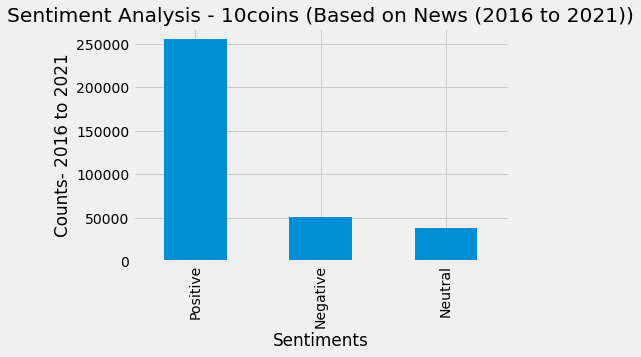

In [30]:
# Plot and visualize sentiment count
plt.title('Sentiment Analysis - 10coins (Based on News (2016 to 2021))')
Final_News_df["Sentiment"].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Counts- 2016 to 2021')
plt.savefig('Analysis/Sentiment Analysis(Based on News (2016 to 2021))')
plt.show()

In [ ]:
# converting date to datetime format
Final_News_df['Dt_Rev_time'] = pd.to_datetime(Final_News_df['Dt_Rev_time'])

In [ ]:
Date_monthly = Final_News_df.groupby(['Dt_Rev_time']).resample('M').sum()

In [ ]:
# Plot the sum of the polrity for each year
plt.figure(figsize=(12.33, 4.5))
plt.title('Sentiment Sum over Time(Based on News Detail Article)')
plt.xlabel('Dt_Rev_time')
plt.ylabel('Polarity')
Date_monthly = Final_News_df.groupby(['Dt_Rev_time']).resample('M').sum()

precip_2003_2013_monthly
polarity = Date_monthly.sum()['Polarity'] 
plt.plot(polarity.index, polarity)
plt.savefig('Analysis/Sentiment Sum over Time(Based on News Detail Article)')

In [ ]:
# show the sum of the polarity for each year
polarity

In [ ]:
# # Get the count of each article per entry
# polarity_count = df.groupby(['Dt_Rev_time']).count()['Polarity']
# polarity_count

In [ ]:
# # Show the average sentiment for each year
# polarity_avg = polarity / polarity_count
# polarity_avg

In [ ]:
# # Plot the average sentiment over time
# plt.figure(figsize=(12.33, 4.5))
# plt.title('Sentiment Average over Time(Based on News Detail Article)')
# plt.xlabel('Dt_Rev_time')
# plt.ylabel('Average Polarity')
# plt.plot(polarity_avg.index, polarity_avg)
# plt.savefig('Analysis/Sentiment Average over Time(Based on News Detail Article)')

In [ ]:
# # Create a function to get subjectivity
# def getSubjectivity(body):
#     return TextBlob(body).sentiment.subjectivity

# #Create new column 
# df['Subjectivity'] = df['body'].apply(getSubjectivity)

# df.head()

In [ ]:
# # Create a scatter plot to show the subjectivity and the polarity
# plt.figure(figsize=(8,6))
# for i in range(0, df.shape[0]):
#     plt.scatter(df['Polarity'][i], df['Subjectivity'][i],color= 'Purple')
# plt.title('Sentiment Analysis Scatter Plot')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')
# plt.show()
# plt.savefig('Analysis/Sentiment Analysis Scatter Plot')